In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('komari.xlsx')

In [3]:
df = df.rename(columns=
{
    '45': 'col_0',
    '1': 'col_1',
    '11': 'col_2',
    '59.00': 'col_3',
    '3.00': 'col_4',
    '29.00': 'col_5',
    '2.00': 'col_6',
    '2': 'col_7',
    '14': 'col_8',
    '0': 'col_9',
    '2_1': 'col_2_1',
    '5': 'col_10',
    'f': 'col_f',
    '4': 'col_12',
    '0_1': 'col_0_1',
    '1_1': 'col_1_1',
    '1_2': 'col_1_2',
    '1_3': 'col_1_3',
    '0_2': 'col_0_2',
    '0_3': 'col_0_3',
    '1_4': 'col_1_4',
    '1_5': 'col_1_5',
    '1_6': 'col_1_6',
    '1_7': 'col_1_7',
    '0_4': 'col_0_4',
    '1_8': 'col_1_8',
    '0_5': 'col_0_5',
    '0_6': 'col_0_6',
    '1_9': 'col_1_9',
    '1_10': 'col_1_10',
    '3.00_1': 'col_3.00_1',
    '2_2': 'col_2_2',
    '4_1': 'col_4_1',
    '0.23934': 'col_',
    'Column_35': 'Column_35',
    '3': 'col_13',
    '2.00_1': 'col_2.00_1',
})

df = df.drop(columns=['Column_35'])

In [4]:
df['col_f'] = (df['col_f'] == 'f').map({True: 1, False: 0})

In [5]:
df_corr = df.corr()

In [6]:
for col_i in df_corr.columns:
    df_corr[col_i] = df_corr[col_i].apply(lambda x: x if abs(x) > 0.85 else pd.NA)


In [7]:
col_0_correlated_cols = df_corr[~pd.isna(df_corr['col_0'])].index.to_list()

In [8]:
df[col_0_correlated_cols].describe()

,col_0,col_3.00_1,col_,col_13,col_2.00_1
count,6399.000000,6399.000000,6399.000000,6399.000000,6399.000000
mean,42.058134,2.994999,-0.000037,3.139397,2.059228
std,12.290421,0.805561,1.000074,0.868113,0.672851
min,18.000000,1.000000,-1.957652,1.000000,1.000000
25%,33.000000,3.000000,-0.737099,3.000000,2.000000
50%,41.000000,3.000000,-0.086138,3.000000,2.000000
75%,51.000000,4.000000,0.727564,4.000000,3.000000
max,77.000000,4.000000,2.843188,5.000000,3.000000


In [9]:
df = df.drop(columns=['col_0', 'col_3.00_1', 'col_13', 'col_2.00_1'])

In [10]:
col_4_correlated_cols = df_corr[~pd.isna(df_corr['col_4'])].index.to_list()

In [11]:
df[col_4_correlated_cols].describe()

,col_4,col_5,col_6,col_2_2
count,6399.000000,6399.000000,6399.000000,6399.000000
mean,2.528364,30.128551,2.069230,2.208783
std,1.073903,21.928626,0.799962,1.243493
min,1.000000,4.200000,1.000000,1.000000
25%,2.000000,13.900000,1.000000,1.000000
50%,2.000000,22.200000,2.000000,2.000000
75%,4.000000,39.500000,3.000000,3.000000
max,4.000000,99.900000,3.000000,6.000000


In [12]:
df = df.drop(columns=['col_4', 'col_6', 'col_2_2'])

In [13]:
df_corr = df.corr()
for col_i in df_corr.columns:
    df_corr[col_i] = df_corr[col_i].apply(lambda x: x if abs(x) > 0.85 else pd.NA)

In [14]:
col_8_correlated_cols = df_corr[~pd.isna(df_corr['col_8'])].index.to_list()

In [15]:
df[col_8_correlated_cols].describe()

,col_8,col_2_1
count,6399.000000,6399.000000
mean,10.565713,1.938115
std,9.725123,0.791828
min,0.000000,1.000000
25%,3.000000,1.000000
50%,8.000000,2.000000
75%,16.000000,3.000000
max,57.000000,3.000000


In [16]:
df = df.drop(columns=['col_2_1'])

In [27]:
binary_columns = [c for c in df.columns if len(df[c].value_counts()) == 2]

In [28]:
non_binary_columns = [c for c in df.columns if c not in binary_columns]

In [51]:
for b_c in binary_columns:
    one_percentage =  len(df[df[b_c] == 1]) / len(df[b_c]) * 100
    print(f'column {b_c} 1s: {round(one_percentage)}% 0s: {100 - round(one_percentage)}%')
    

column col_1 1s: 50% 0s: 50%
column col_9 1s: 5% 0s: 95%
column col_f 1s: 50% 0s: 50%
column col_0_1 1s: 40% 0s: 60%
column col_1_1 1s: 42% 0s: 58%
column col_1_2 1s: 43% 0s: 57%
column col_1_3 1s: 25% 0s: 75%
column col_0_3 1s: 51% 0s: 49%
column col_1_4 1s: 51% 0s: 49%
column col_1_5 1s: 99% 0s: 1%
column col_1_6 1s: 96% 0s: 4%
column col_1_7 1s: 97% 0s: 3%
column col_0_4 1s: 20% 0s: 80%
column col_1_8 1s: 44% 0s: 56%
column col_0_5 1s: 19% 0s: 81%
column col_0_6 1s: 57% 0s: 43%
column col_1_9 1s: 89% 0s: 11%
column col_1_10 1s: 42% 0s: 58%


In [52]:
df = df.drop(columns = ['col_9', 'col_1_5', 'col_1_6', 'col_1_7'])

In [53]:
for i in ['col_9', 'col_1_5', 'col_1_6', 'col_1_7']:
    binary_columns.remove(i)

In [54]:
binary_columns

['col_1',
 'col_f',
 'col_0_1',
 'col_1_1',
 'col_1_2',
 'col_1_3',
 'col_0_3',
 'col_1_4',
 'col_0_4',
 'col_1_8',
 'col_0_5',
 'col_0_6',
 'col_1_9',
 'col_1_10']

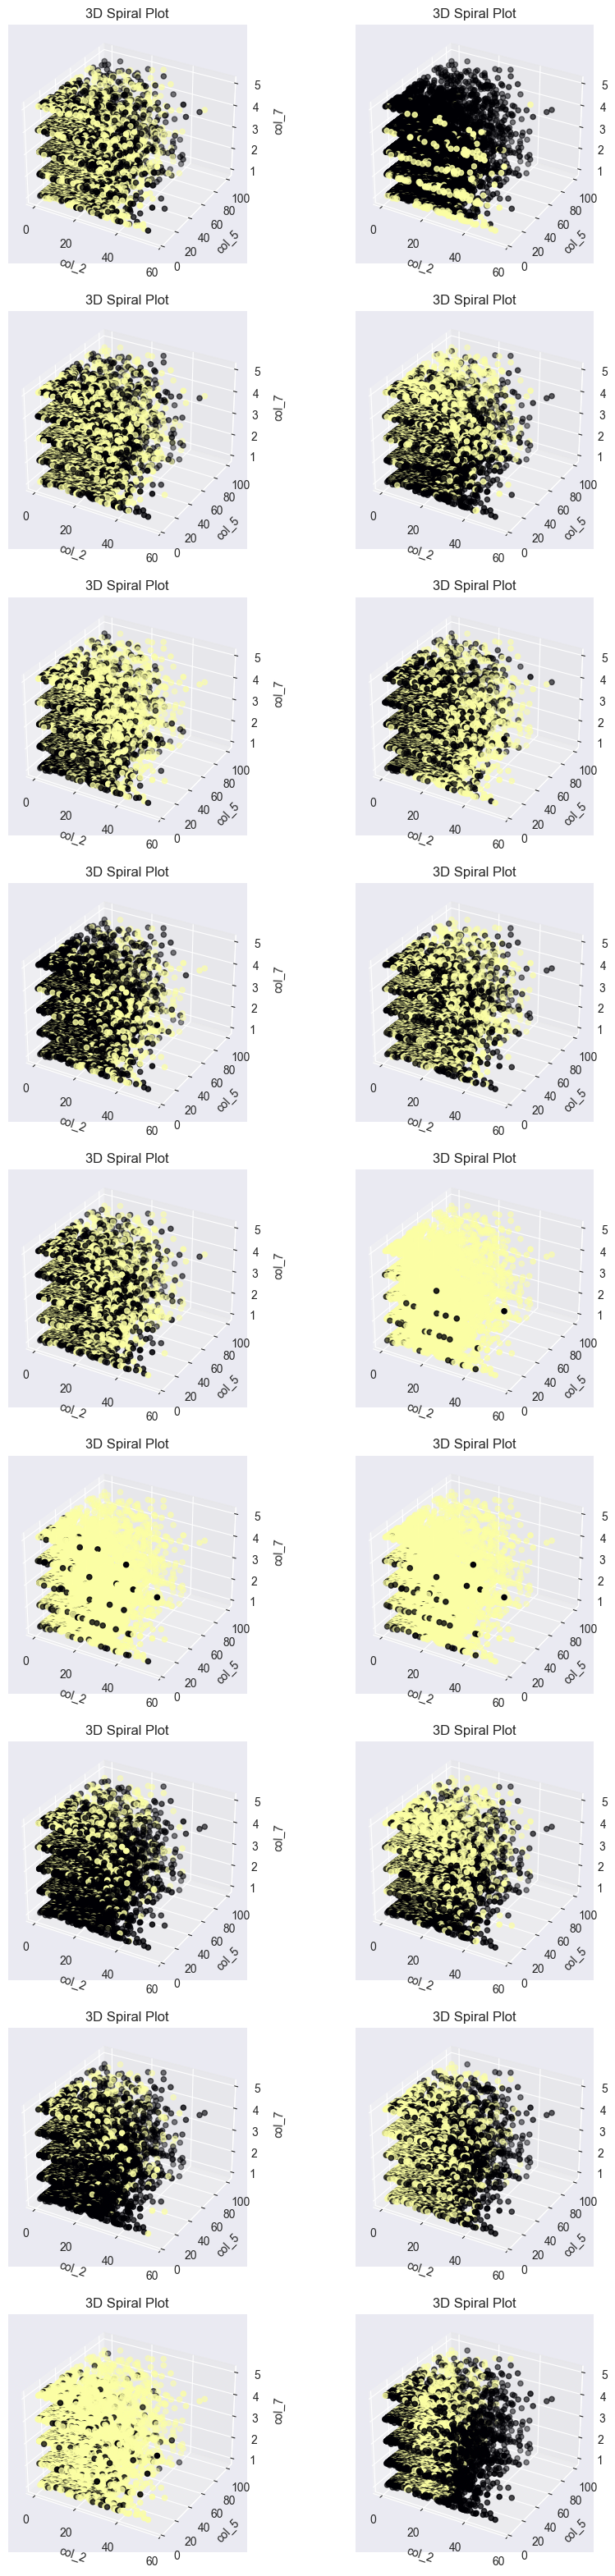

In [37]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(
    9, 2,
    figsize=(10, 40),
    subplot_kw={'projection': '3d'}
)

for row_i in range(9):
    for col_i in range(2):
        index = row_i * 2 + col_i

        ax = axes[row_i, col_i]

        ax.scatter(df['col_2'], df['col_5'], df['col_7'], c=df[binary_columns[index]], cmap="inferno")
        ax.set_title("3D Spiral Plot")
        ax.set_xlabel("col_2")
        ax.set_ylabel("col_5")
        ax.set_zlabel("col_7")

plt.show()

In [29]:
len(binary_columns)

18

In [ ]:
# for col in df.columns:
#     fig, axes = plt.subplots(7,4, figsize=(20,40))
# 
#     col_x = col
# 
#     for row_i in range(7):
#         for col_i in range(4):
#             index = row_i * 4 + col_i
# 
#             if index > len(df.columns) - 1:
#                 break
# 
#             col_y = df.columns[index]
# 
#             axes[row_i, col_i].scatter(df[col_x], df[col_y], s=5)
#             axes[row_i, col_i].set_xlabel(col_x)
#             axes[row_i, col_i].set_ylabel(col_y)
# 
# plt.tight_layout()
# plt.show()